# 1.Import Data

In [1]:
import numpy as np
import pickle
import sklearn
from tqdm import tqdm

In [2]:
y_name={
    "y_train":"train_y",
    "y_test":"test_y"
}

In [3]:
def open_pkl(file_name):
    all_data=dict()
    for each_key in file_name.keys():
        name = file_name[each_key]
        pickle_file = open('DataSet\\'+name+".pkl",mode="rb")
        data = pickle.load(pickle_file)
        pickle_file.close()
        all_data[each_key]=data
    return all_data

In [4]:
y_data = open_pkl(y_name)
y_train = y_data["y_train"]
y_test = y_data["y_test"]

In [5]:
y_train

array([0, 3, 0, ..., 0, 0, 0])

In [6]:
file_name0={
    "train0":"vec_train_a_no_cor_word2vec",
    "train1":"vec_train_a_no_emo_word2vec",
    "train2":"vec_train_a_emo_word2vec",
    "train3":"vec_train_a_no_cor_glove",
    "train4":"vec_train_a_no_emo_glove",
    "train5":"vec_train_a_emo_glove"
    }
file_name1={
    "test0":"vec_test_a_no_cor_word2vec",
    "test1":"vec_test_a_no_emo_word2vec",
    "test2":"vec_test_a_emo_word2vec",
    "test3":"vec_test_a_no_cor_glove",
    "test4":"vec_test_a_no_emo_glove",
    "test5":"vec_test_a_emo_glove"
}

In [7]:
#import data
def open_pkl_data(file_name):
    all_data=dict()
    for each_key in file_name.keys():
        name = file_name[each_key]
        pickle_file = open('DataSet\\'+name+".pkl",mode="rb")
        data = pickle.load(pickle_file)
        pickle_file.close()
        all_data[each_key]=np.array(data)
    return all_data

In [8]:
train_data = open_pkl_data(file_name0)
test_data = open_pkl_data(file_name1)

In [9]:
len(test_data["test2"])

5509

# 2. Calculation of the average vectors of each sentence

In [10]:
length = len(train_data["train0"][0][0])
print(length)

300


In [11]:
def cal_average(all_data):
    output_dict=dict()
    for key in all_data.keys():
        sentences = list()
        for sentence in all_data[key]:
            sentence = np.array(sentence)
            length = len(sentence)
            sum_sen = sentence.sum(axis=0)
            aver_sen = sum_sen/length
            sentences.append(aver_sen)
        output_dict[key]=sentences
    
    return output_dict

In [12]:
ave_train = cal_average(train_data)
ave_test = cal_average(test_data)

In [13]:
length = len(ave_train["train0"][0])
print(length)

300


In [14]:
ave_train["train0"][0]

array([ 1.48790143e-02,  8.35011825e-02,  1.41309947e-01,  2.31635198e-01,
       -2.35316381e-01,  7.14111328e-02,  7.74841309e-02, -1.55843094e-01,
        1.42866343e-01, -2.02106908e-02, -5.99975586e-02, -2.39198476e-01,
       -1.73956975e-01, -4.37494926e-02, -2.59769022e-01,  2.53160268e-01,
        4.07409668e-02,  2.37617493e-01,  7.37948939e-02, -1.48871526e-01,
       -1.82404414e-01,  8.72938335e-02,  2.04387665e-01, -2.63637975e-02,
       -8.17966461e-03,  8.77770334e-02, -1.43776789e-01, -5.63685112e-02,
        1.02970548e-01, -1.66022405e-01, -1.04353167e-02,  1.25955790e-01,
       -1.38939753e-01, -1.32683650e-01, -7.12271780e-02,  1.57701284e-01,
        4.39724401e-02,  1.91438466e-01,  1.67304147e-02,  1.42083064e-01,
        3.30420583e-02, -5.66474050e-02,  3.75739217e-01,  3.08278408e-02,
        8.15709457e-02, -1.58691406e-02,  1.78154837e-02, -5.59285469e-02,
       -4.13547084e-02,  2.69300677e-02, -4.17777151e-02,  2.09974498e-01,
        7.85675049e-02,  

# 3.Logistic Regression Model
## 3.1. build and fit model

In [15]:
from sklearn.linear_model import LogisticRegression
def lr_model(train_data,y_train):
    classifiers = dict()
    for key in tqdm(train_data.keys()):
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(train_data[key],y_train)
        classifiers[key]=classifier
    
    return classifiers

In [16]:
classifiers = lr_model(ave_train,y_train)

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 17%|██████████████                                                                      | 1/6 [00:01<00:08,  1.80s/it]C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

In [17]:
# save model
def save_data(name,data):
    pickle_file = open('DataSet\\'+name+".pkl",mode='wb')
    pickle.dump(data,pickle_file)
    pickle_file.close()

In [18]:
# save model
save_data("LogisticRegression_all",classifiers)

## 3.2. prediction

In [19]:
# function for getting prediction
def get_prediction(classifiers, ave_test):
    y_pred_dict= dict()
    list1 = list(classifiers.keys())
    list2 = list(ave_test.keys())
    length = len(list1)
    
    for i in tqdm(range(length)):
        y_pred_dict[list2[i]]=classifiers[list1[i]].predict(ave_test[list2[i]])
        
    return y_pred_dict

In [20]:
y_preds = get_prediction(classifiers,ave_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 44.56it/s]


In [21]:
# function for getting the score of each prediction
def get_scores(classifiers, ave_test):
    y_score_dict= dict()
    list1 = list(classifiers.keys())
    list2 = list(ave_test.keys())
    length = len(list1)
    
    for i in tqdm(range(length)):
        y_score_dict[list2[i]]=classifiers[list1[i]].decision_function(ave_test[list2[i]])
        
    return y_score_dict

In [22]:
y_scores = get_scores(classifiers, ave_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 42.97it/s]


In [23]:
# function for saving the predictions and scores
def save_prediction(name,data):
    pickle_file = open('Prediction\\'+name+".pkl",mode='wb')
    pickle.dump(data,pickle_file)
    pickle_file.close()

In [24]:
save_prediction("LogisticRegression_preds",y_preds)
save_prediction("LogisticRegression_scores",y_scores)

## 3.3. Evaluation: confusion matrix, accuracy, precision, recall, F1 measure

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# print evaluation result
def get_evaluation(y_test,y_pred):
    ev = dict()
    ev["confusion_matrix"]=confusion_matrix(y_test,y_pred)
    ev["accuracy"] = accuracy_score(y_test,y_pred)
    ev["precision_macro"]=precision_score(y_test,y_pred,average="macro")
    ev["precision_micro"]=precision_score(y_test,y_pred,average="micro")
    ev["precision_weighted"]=precision_score(y_test,y_pred,average="weighted")
    ev["recall_macro"]=recall_score(y_test,y_pred,average="macro")
    ev["recall_micro"]=recall_score(y_test,y_pred,average="micro")
    ev["recall_weighted"]=recall_score(y_test,y_pred,average="weighted")
    ev["F1_score_macro"]=f1_score(y_test,y_pred,average="macro")
    ev["F1_score_micro"]=f1_score(y_test,y_pred,average="micro")
    ev["F1_score_weighted"]=f1_score(y_test,y_pred,average="weighted")
    
    for key in ev.keys():
        if key !="confusion_matrix":
            print("{a} is: {b}".format(a=key, b=ev[key]))
        else:
            print(ev[key])
    
    return ev

    

In [26]:
#"macro": "Calculate metrics for each label, and find their unweighted mean. ",
#"micro": "Calculate metrics globally by counting the total true positives, false negatives and false positives."
#"weighted":"Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). "

def get_evaluation_all(y_test, y_pred_dict):
    for key in tqdm(y_pred_dict.keys()):
        print("evaluation on data {0}".format(key))
        get_evaluation(y_test, y_pred_dict[key])
        print("***************************************")
    

In [27]:
get_evaluation_all(y_test,y_preds)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 33.61it/s]

evaluation on data test0
[[4014  204  222  237]
 [ 124  139   13    8]
 [  66    7  159   18]
 [  62    5   15  216]]
accuracy is: 0.8219277545834089
precision_macro is: 0.5430425198135165
precision_micro is: 0.8219277545834089
precision_weighted is: 0.8610436996355724
recall_macro is: 0.6771278244001984
recall_micro is: 0.8219277545834089
recall_weighted is: 0.8219277545834089
F1_score_macro is: 0.5928184966761147
F1_score_micro is: 0.8219277545834089
F1_score_weighted is: 0.8365130913044833
***************************************
evaluation on data test1
[[4031  185  221  240]
 [ 129  140    9    6]
 [  74    5  153   18]
 [  68    4   11  215]]
accuracy is: 0.8239244872027591
precision_macro is: 0.5483360919935072
precision_micro is: 0.8239244872027591
precision_weighted is: 0.8590049427554046
recall_macro is: 0.6720778820753466
recall_micro is: 0.8239244872027591
recall_weighted is: 0.8239244872027591
F1_score_macro is: 0.5948782702287997
F1_score_micro is: 0.823924487202759
F1_sco

## 3.4. Evaluation: ROC curve, AUC

In [28]:
# in order to plot ROC curve and calculate AUC, I need to turn y label into 1 hot representation.
# transfer y label from {class:[0,1,2,3]} into {class: [1,0,0,0], [0,1,0,0],[0,0,1,0],[0,0,0,1]}
import tensorflow as tf
y_test1hot = tf.keras.utils.to_categorical(y_test,num_classes=4)

In [29]:
emotion = {"others":0,"happy":1,"sad":2,"angry":3}
print(y_test1hot[13])#3 - 4th
print(y_test1hot[0])#0 - 1st
print(y_test1hot[6])#1 - 2nd

[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]


In [30]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

In [31]:
def compute_roc_auc(y_test1hot, y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_class = 4
    
    # compute roc curve and auc based on each label
    for i in range(n_class):
        fpr[i],tpr[i],_ = roc_curve(y_test1hot[:,i],y_score[:,i])
        roc_auc[i] = auc(fpr[i],tpr[i])
    
    # compute roc curve and auc based on average type = "micro"
    fpr["micro"],tpr["micro"],_=roc_curve(y_test1hot.ravel(),y_score.ravel())
    roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])
    
    # compute roc curve and auc based on average type = "macro"
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_class):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        
    # Finally average it and compute AUC
    mean_tpr = mean_tpr/n_class
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"],tpr["macro"])
    
    return fpr, tpr, roc_auc

In [32]:
def compute_roc_auc_all(y_test1hot, y_scores):
    fprs=dict()
    tprs=dict()
    roc_aucs=dict()
    for key in tqdm(y_scores.keys()):
        fprs[key],tprs[key],roc_aucs[key]=compute_roc_auc(y_test1hot,y_scores[key])
    
    return fprs,tprs,roc_aucs

In [33]:
def plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all"):
    n_class=4
    
    # make variable choose as command for choosing which curve to show
    # below it's the explaination of choose
    ex_choose = {
        "all": "show all curves",
        "macro": "only show macro curve",
        "micro": "only show micro curve",
        "label": "only show curves of labels"
        }
    
    colors = ["y", "g","cornflowerblue","r"]
    label_name = ["others", "happy","sad","angry"]
    plt.figure()
    
    if (choose !="macro") and (choose !="label"):
        # draw the line of micro-average ROC curve
        plt.plot(fpr["micro"],tpr["micro"],
                 label="micro-average ROC (AUC: {0:0.2f})".format(roc_auc["micro"]),
                 color = 'deeppink',linestyle=':',lw=4)
    
    if (choose !="micro") and (choose !="label"):
        # draw the line of macro-average ROC curve
        plt.plot(fpr["macro"],tpr["macro"],
                 label="macro-average ROC (AUC: {0:0.2f})".format(roc_auc["macro"]),
                 color = 'navy',linestyle=':',lw=4)
        
    if (choose !="macro") and (choose !="micro"):    
        # draw line of each label
        for i in range(n_class):
            plt.plot(fpr[i],tpr[i],color=colors[i],lw=2,
                     label="ROC of class {0} {1} (AUC: {2:0.2f})"
                     "".format(i,label_name[i],roc_auc[i]))
    
    plt.plot([0,1],[0,1],linestyle="--",color='k',lw=2)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve on data {0} by model {1}'.format(dataname,modelname))
    
    plt.legend(loc="lower right")
    plt.savefig("Pictures\\{a}\\SingleData\\ROC Curve by model {b}_{c} on data {d}.png".format(a=modelname,d=dataname,b=modelname,c=choose))
    plt.show()
    

In [34]:
fprs,tprs,roc_aucs=compute_roc_auc_all(y_test1hot, y_scores)

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 101.97it/s]


In [35]:
modelname="LogisticRegression"

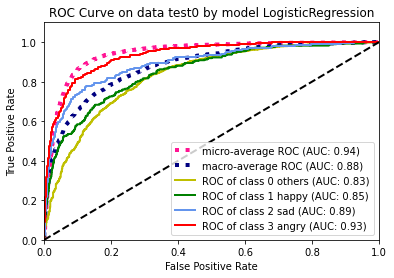

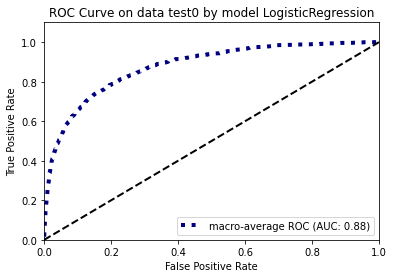

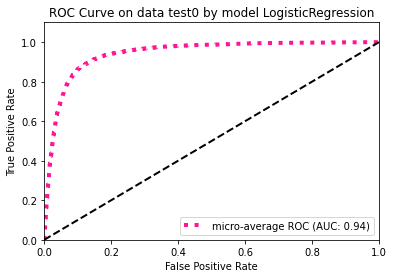

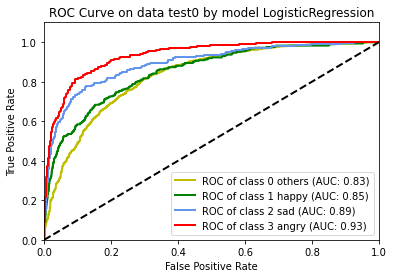

In [36]:
key_name = "test0"
fpr = fprs[key_name]
tpr = tprs[key_name]
roc_auc = roc_aucs[key_name]
dataname=key_name
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "macro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "micro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "label")

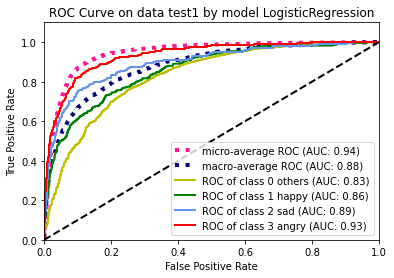

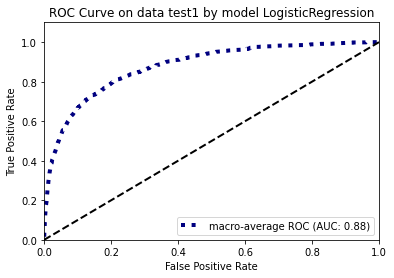

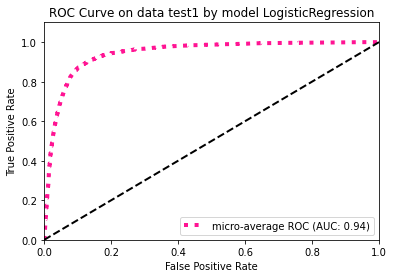

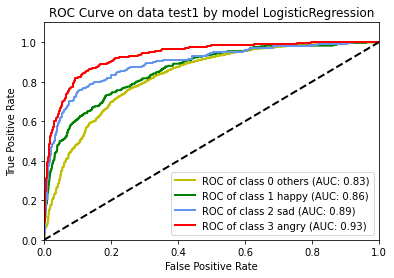

In [37]:
key_name = "test1"
fpr = fprs[key_name]
tpr = tprs[key_name]
roc_auc = roc_aucs[key_name]
dataname=key_name
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "macro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "micro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "label")

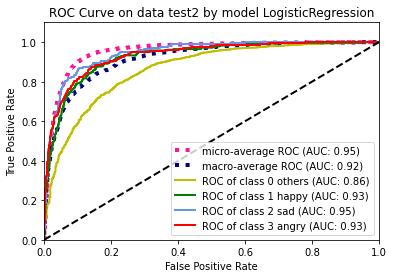

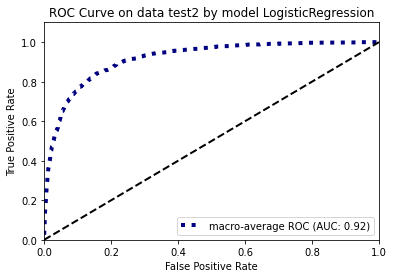

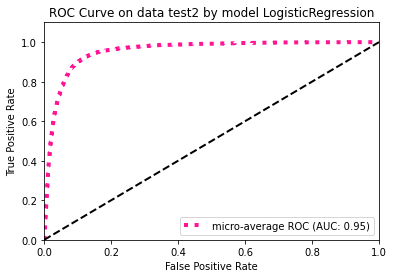

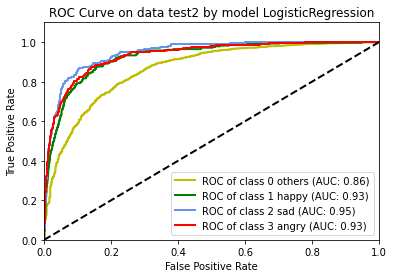

In [38]:
key_name = "test2"
fpr = fprs[key_name]
tpr = tprs[key_name]
roc_auc = roc_aucs[key_name]
dataname=key_name
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "macro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "micro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "label")

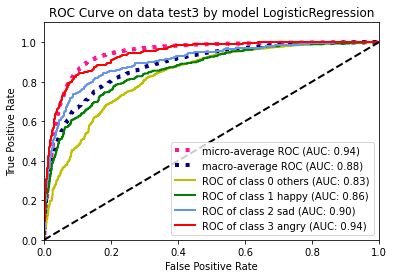

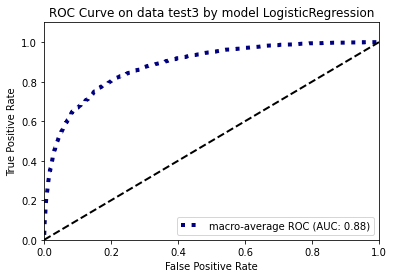

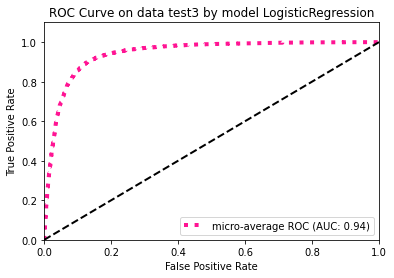

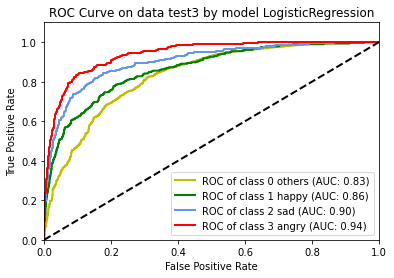

In [39]:
key_name = "test3"
fpr = fprs[key_name]
tpr = tprs[key_name]
roc_auc = roc_aucs[key_name]
dataname=key_name
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "macro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "micro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "label")

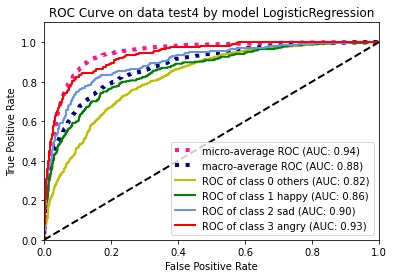

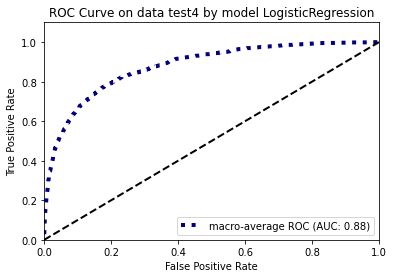

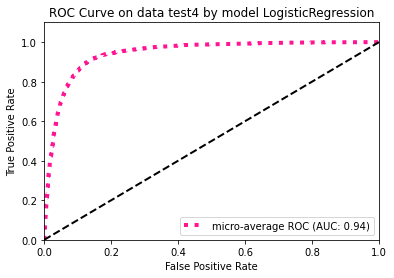

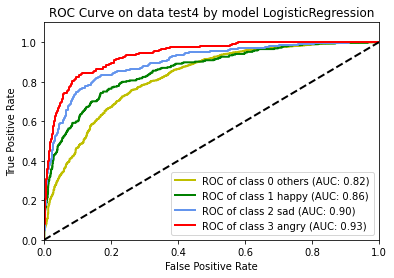

In [40]:
key_name = "test4"
fpr = fprs[key_name]
tpr = tprs[key_name]
roc_auc = roc_aucs[key_name]
dataname=key_name
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "macro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "micro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "label")

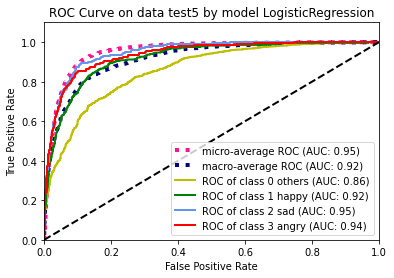

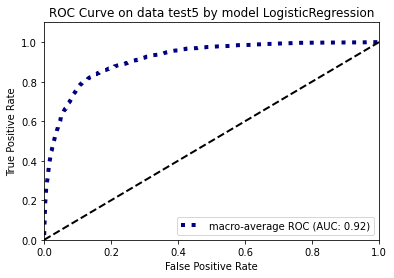

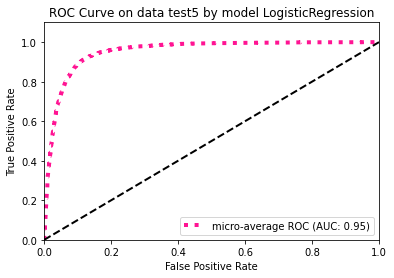

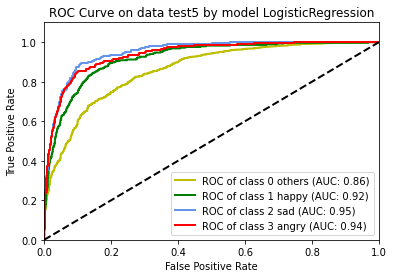

In [41]:
key_name = "test5"
fpr = fprs[key_name]
tpr = tprs[key_name]
roc_auc = roc_aucs[key_name]
dataname=key_name
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "macro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "micro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "label")

## 3.5. Evaluation: P-R curve, average precision

In [42]:
def compute_p_r_curve(y_test1hot, y_score):
    n_class = 4
    precision = dict()
    recall = dict()
    average_precision =dict()
    
    # compute P-R curve on each label
    for i in range(n_class):
        precision[i],recall[i], _ = precision_recall_curve(y_test1hot[:,i],y_score[:,i])
        average_precision[i] = average_precision_score(y_test1hot[:,i],y_score[:,i])
        
    # compute P-R curve with average = "micro"
    precision["micro"],recall["micro"],_=precision_recall_curve(y_test1hot.ravel(),y_score.ravel())
    average_precision["micro"]=average_precision_score(y_test1hot,y_score,average="micro")
    
    return precision,recall,average_precision

In [43]:
def compute_p_r_curve_all(y_test1hot, y_scores):
    recalls=dict()
    precisions=dict()
    average_precisions=dict()
    for key in y_scores.keys():
        recalls[key],precisions[key],average_precisions[key]=compute_p_r_curve(y_test1hot,y_scores[key])
    
    return recalls,precisions,average_precisions
    

In [44]:
def plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all"):
    n_class=4
    
    # make variable choose as command for choosing which curve to show
    # below it's the explaination of choose
    ex_choose = {
        "all": "show all curves",
        "micro": "only show micro curve",
        "label": "only show curves of labels"
        }
    
    colors = ["y", "g","cornflowerblue","r"]
    label_name = ["others", "happy","sad","angry"]
    plt.figure()
    
    if choose !="label":
        # draw the line of micro-average ROC curve
        plt.plot(recall["micro"],precision["micro"],
                 label="micro-average P-R curve (average precision: {0:0.2f})".format(average_precision["micro"]),
                 color = 'deeppink',linestyle=':',lw=4)
    
        
    if choose !="micro":    
        # draw line of each label
        for i in range(n_class):
            plt.plot(recall[i],precision[i],color=colors[i],lw=2,
                     label="P-R curve of class {0} {1} (average precision: {2:0.2f})"
                     "".format(i,label_name[i],average_precision[i]))
    
    plt.plot([0,1],[1,0],linestyle="--",color='k',lw=2)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('P-R Curve on data {0} by model {1}'.format(dataname,modelname))
    
    plt.legend(loc="lower left")
    plt.savefig("Pictures\\{a}\\SingleData\\P-R Curve by model {b}_{c} on data {d}.png".format(a=modelname,d=dataname,b=modelname,c=choose))
    plt.show()
    

In [45]:
recalls,precisions,average_precisions = compute_p_r_curve_all(y_test1hot, y_scores)

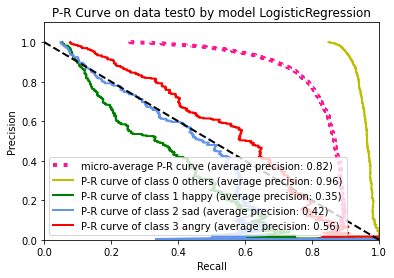

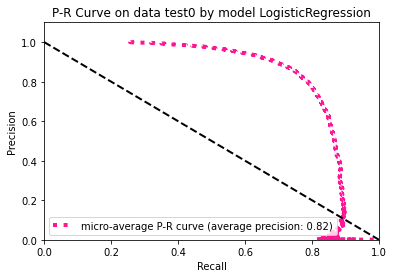

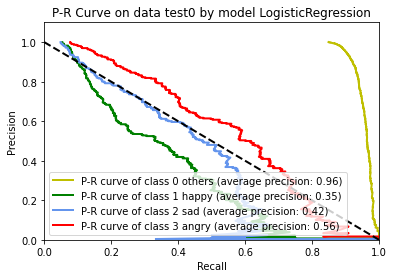

In [46]:
key_name="test0"
recall=recalls[key_name]
precision=precisions[key_name]
average_precision=average_precisions[key_name]
dataname=key_name
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "micro")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "label")

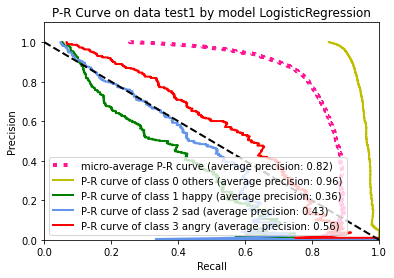

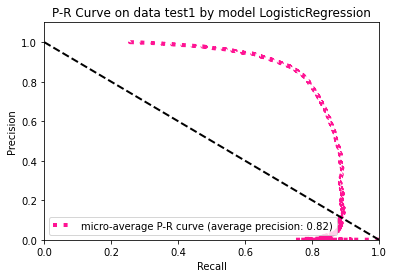

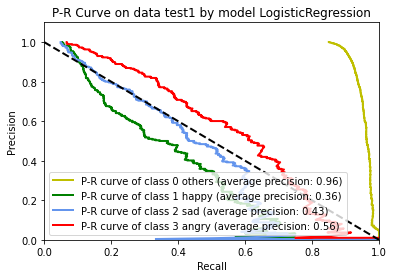

In [47]:
key_name="test1"
recall=recalls[key_name]
precision=precisions[key_name]
average_precision=average_precisions[key_name]
dataname=key_name
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "micro")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "label")

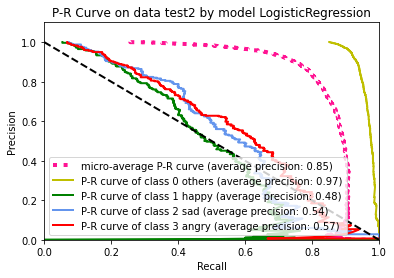

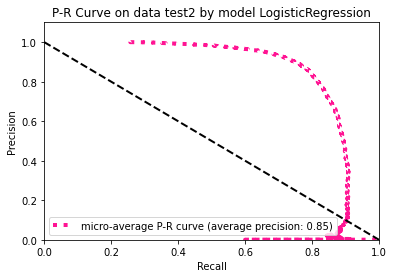

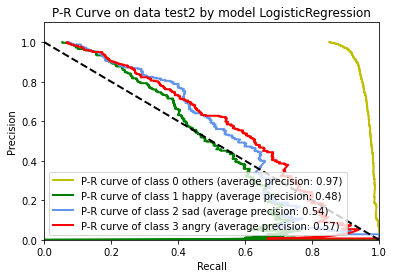

In [48]:
key_name="test2"
recall=recalls[key_name]
precision=precisions[key_name]
average_precision=average_precisions[key_name]
dataname=key_name
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "micro")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "label")

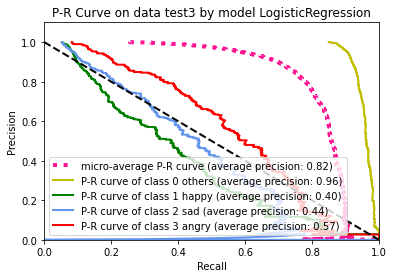

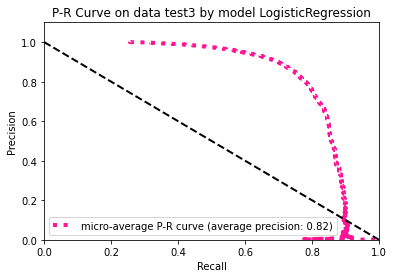

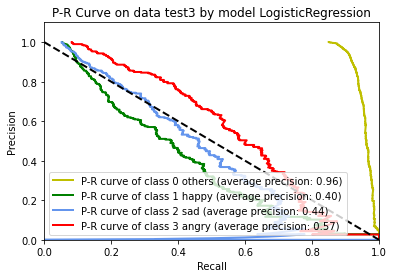

In [49]:
key_name="test3"
recall=recalls[key_name]
precision=precisions[key_name]
average_precision=average_precisions[key_name]
dataname=key_name
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "micro")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "label")

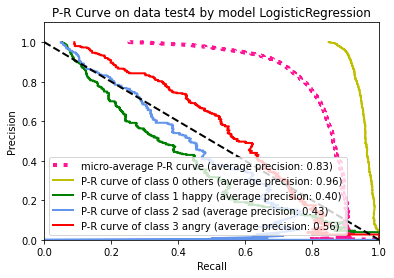

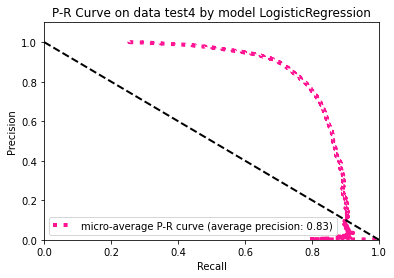

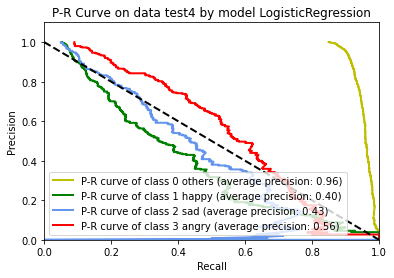

In [50]:
key_name="test4"
recall=recalls[key_name]
precision=precisions[key_name]
average_precision=average_precisions[key_name]
dataname=key_name
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "micro")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "label")

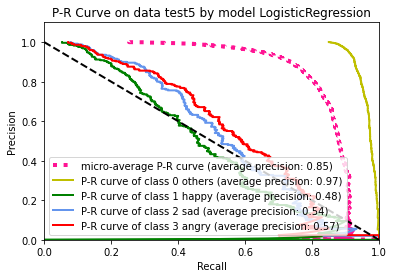

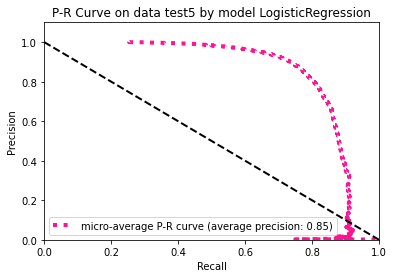

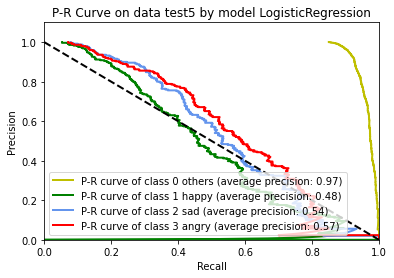

In [51]:
key_name="test5"
recall=recalls[key_name]
precision=precisions[key_name]
average_precision=average_precisions[key_name]
dataname=key_name
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "micro")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "label")

# 4. if just want to directly load the model

In [52]:
model_names = {
    "model_all":"LogisticRegression_all"
}

In [53]:
model_data = open_pkl(model_names)
classifiers = model_data["model_all"]